# Aprendizaje Supervisado: Clasificacion de Digitos Manuscritos

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

# Visualizamos nuestros DataSet

In [2]:
# importar matplotlib y activamos la funcion (inline)
%matplotlib inline

import matplotlib.pyplot as plt

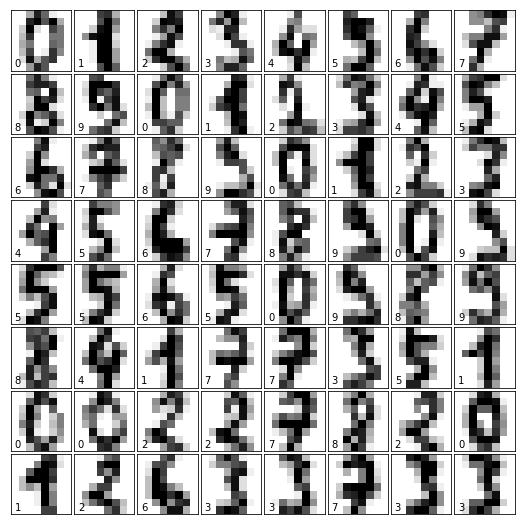

In [3]:
fig = plt.figure(figsize=(7,7))# Tamaño de la figura
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# trazar los digitos: cada imagen es 8x8 pixeles
for i in range(64):
    ax = fig.add_subplot(8,8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # Etiqueta la imagen con el valor objetivo = (Funcion Objetivo)
    ax.text(0,7, str(digits.target[i]))

# Visualización de Datos

Un buen primer paso para muchos problemas es visualizarlos usando reduccion de la Dimensionalidad.
Metodo espectral lineal: Analisis de Componentes Principales (PCA)
PCA busca las combinaciones lineales ortogonales de las caracteristicas que muestran las mayores variantes, y como tal, puede ayudar a darle una buena idea de la estructura del conjunto de datos. Vamos a utilizar Tandomized_PCA, porque es mas rapido para N Grande.

In [4]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=2, random_state=1999)
proj = pca.fit_transform(digits.data)

/srv/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


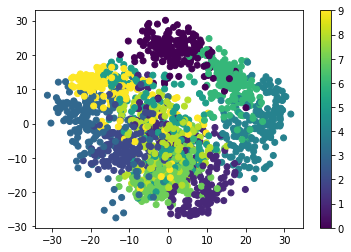

In [5]:
               #eje x   eje y    dstos
plt.scatter(proj[:,0], proj[:,1], c=digits.target)
plt.colorbar()

Aqui vemos que los digitos se agrupan bastante bien, asi que podemos esperar incluso un esquema de clasificacion bastante ingenuo para hacer un trabajo decente en terminos de separacion de clases.

Una debilidad de PCA es que produce una reduccion de la dimensionalidad lineal: esto puede perder algunas relaciones interesantes en los datos. Si queremos un mapeo no lineal de los datos, podemos utilizar uno de los varios metodos de Reduccion de la DImensión. Aquí utilizaremos ISOMAP, que es un metodo de aprendizaje multiple basado en teoria de grafos.

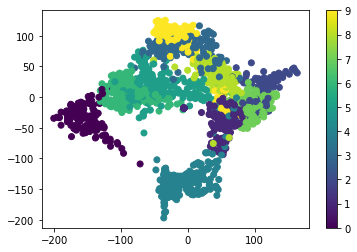

In [6]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(digits.data)
# Para visualizarlo
plt.scatter(proj[:,0], proj[:,1], c=digits.target)
plt.colorbar()

# Clasificación mediante KNN

KNN es un algoritmo no parametrico, el cual calcula un nuevo dato segun los ejemplos (Datos) y su configuracion del universo observable llamado K.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

/srv/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Dividir nuestros datos en conjuntos de entrenamiento y evaluacion
X_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

# Entrenar el modelo
clf = KNeighborsClassifier() # Instancia de clase --> objeto de tipo KNN
clf.fit(X_train, y_train) # Aqui lo entrenamos

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Utilizamos el modelo para predecir las etiquetas de los datos de prueba

In [10]:
predicted = clf.predict(x_test)
expected = y_test # Funcion objetivo

# Vamos a ver que tan bien funciona?

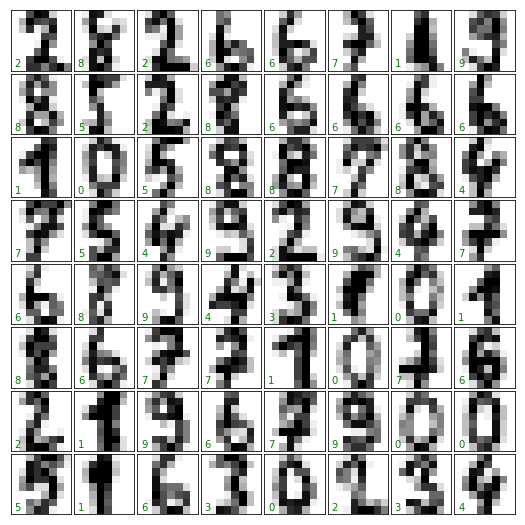

In [16]:
fig = plt.figure(figsize=(7,7))# Tamaño de la figura
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# trazar los digitos: cada imagen es 8x8 pixeles
for i in range(64):
    ax = fig.add_subplot(8,8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test.reshape(-1,8,8)[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # Etiqueta la imagen con el valor objetivo = (Funcion Objetivo)
    if predicted[i] == expected[i]:
        ax.text(0,7,str(predicted[i]), color='green')
    else:
        ax.text(0,7,str(predicted[i]), color='red')

# Medida cuantitativa del Rendimiento

In [12]:
matches = (predicted == expected)
print(matches.sum())
print(len(matches))

441
450


In [13]:
# Manera manual de saber que tan bien funciona
matches.sum() / float(len(matches))

0.97999999999999998